In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# 가상의 데이터 생성
np.random.seed(42)
x_train = np.linspace(0, 10, 20)
y_train = 3 * x_train + np.random.normal(0, 2, size=len(x_train))

In [3]:
x_train

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [4]:
y_train

array([ 0.99342831,  1.30241877,  4.45327181,  7.78290182,  5.84748272,
        7.42646293, 12.63210984, 12.58750104, 11.69263018, 15.2956464 ,
       14.8626383 , 16.43696155, 19.43129296, 16.6997553 , 18.65542749,
       22.55963547, 23.23749565, 27.47059993, 26.60500448, 27.1753926 ])

In [5]:
# 사전 확률 정의: 단순한 정규 분포로 가정
mu_prior = 0
sigma_prior = 10

In [6]:
# 사후 분포 계산 (여기서는 단순히 예시로 평균을 추정)
mu_posterior = (np.mean(y_train) / len(x_train)) + mu_prior
sigma_posterior = sigma_prior / np.sqrt(len(x_train))

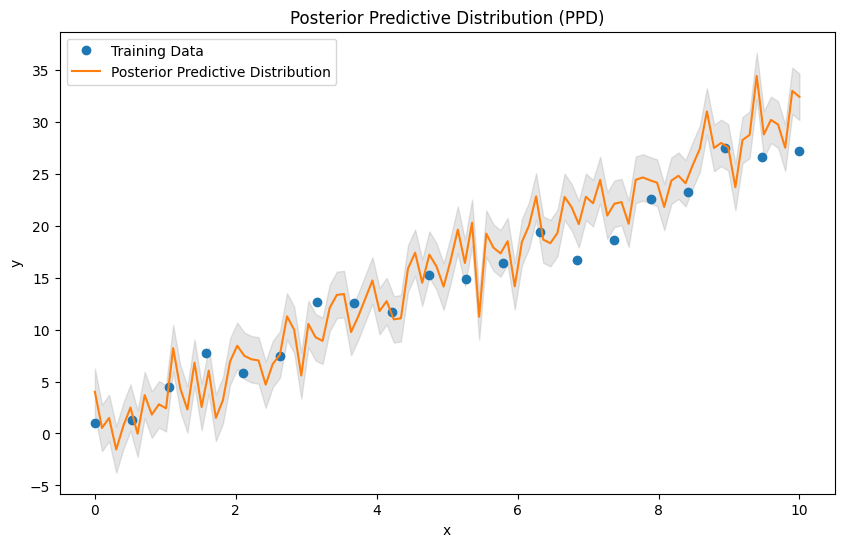

In [7]:
# 새로운 관측치를 위한 사후 예측 분포 (PPD) 계산
x_new = np.linspace(0, 10, 100)
y_new = 3 * x_new + np.random.normal(mu_posterior, sigma_posterior, size=len(x_new))

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, 'o', label='Training Data')
plt.plot(x_new, y_new, '-', label='Posterior Predictive Distribution')
plt.fill_between(x_new, y_new - sigma_posterior, y_new + sigma_posterior, color='gray', alpha=0.2)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Posterior Predictive Distribution (PPD)')
plt.show()

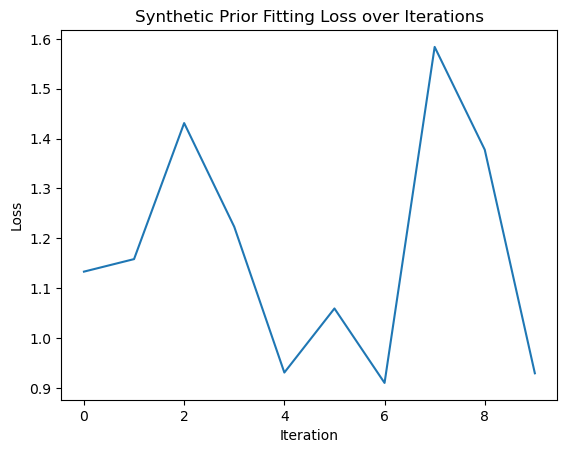

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 사전 확률을 정의 (예: 회귀 계수에 대한 정규 분포)
def sample_prior():
    return np.random.normal(0, 1, size=2)

# 샘플링된 파라미터를 사용해 합성 데이터 생성
def generate_synthetic_data(theta, num_samples=100):
    x = np.linspace(0, 10, num_samples)
    noise = np.random.normal(0, 1, size=num_samples)
    y = theta[0] * x + theta[1] + noise
    return x, y

# 학습 손실 함수 계산 (단순 예제에서는 선형 회귀의 손실로 대체)
def compute_loss(model, x_train, y_train, x_test, y_test):
    model.fit(x_train.reshape(-1, 1), y_train)
    y_pred = model.predict(x_test.reshape(-1, 1))
    loss = np.mean((y_pred - y_test) ** 2)  # MSE를 손실로 사용
    return loss

# 메인 함수: 합성 사전 적합 과정
def synthetic_prior_fitting(num_iterations=10, num_samples=100):
    losses = []
    for _ in range(num_iterations):
        theta = sample_prior()  # 사전에서 파라미터 샘플링
        x, y = generate_synthetic_data(theta, num_samples)  # 합성 데이터 생성
        
        # 데이터를 훈련/테스트로 분할
        split_idx = num_samples // 2
        x_train, y_train = x[:split_idx], y[:split_idx]
        x_test, y_test = x[split_idx:], y[split_idx:]
        
        model = LinearRegression()
        loss = compute_loss(model, x_train, y_train, x_test, y_test)  # 손실 계산
        losses.append(loss)
    
    return losses

# 합성 사전 적합 수행
losses = synthetic_prior_fitting()
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Synthetic Prior Fitting Loss over Iterations')
plt.show()

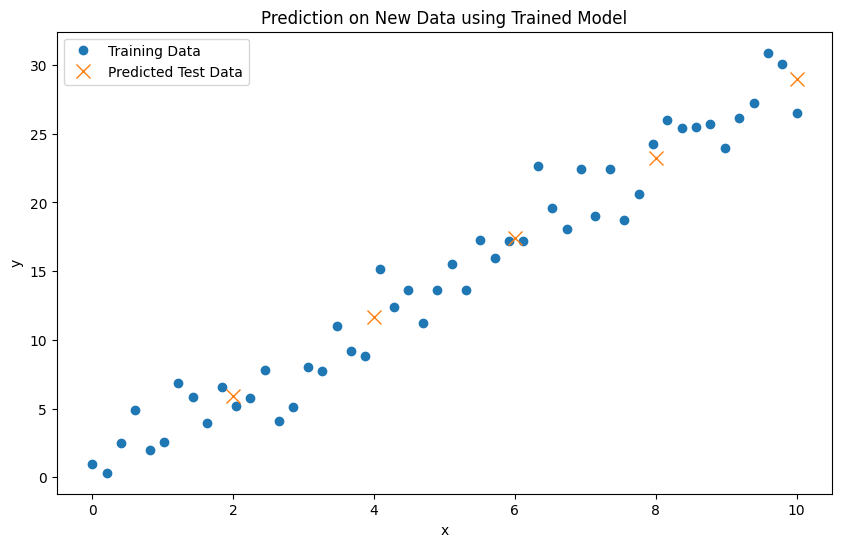

Predictions for new data points: [ 5.89695259 11.66501899 17.43308539 23.20115179 28.96921819]


In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 학습된 모델 (간단한 선형 회귀로 가정)
def trained_model(x_train, y_train):
    model = LinearRegression()
    model.fit(x_train.reshape(-1, 1), y_train)
    return model

# 실제 세계의 새로운 데이터에 대한 예측
def predict_new_data(model, x_test):
    y_pred = model.predict(x_test.reshape(-1, 1))
    return y_pred

# 가상의 훈련 데이터 생성
np.random.seed(42)
x_train = np.linspace(0, 10, 50)
y_train = 3 * x_train + np.random.normal(0, 2, size=len(x_train))

# 모델 학습
model = trained_model(x_train, y_train)

# 새로운 데이터 생성 및 예측
x_test = np.array([2, 4, 6, 8, 10])  # 새로운 테스트 데이터
y_pred = predict_new_data(model, x_test)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, 'o', label='Training Data')
plt.plot(x_test, y_pred, 'x', label='Predicted Test Data', markersize=10)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediction on New Data using Trained Model')
plt.show()

print(f"Predictions for new data points: {y_pred}")

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 간단한 데이터셋 생성 (예: 1000개의 샘플과 10개의 특징)
np.random.seed(42)
X = np.random.rand(1000, 10)  # 1000개의 샘플과 10개의 특징
y = np.random.randint(0, 2, 1000)  # 이진 분류 라벨

# Tensor로 변환
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# 데이터셋 및 데이터로더 생성
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Transformer 모델 정의
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_heads, num_classes):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, 128)
        self.transformer_layer = nn.TransformerEncoderLayer(d_model=128, nhead=num_heads)
        self.transformer = nn.TransformerEncoder(self.transformer_layer, num_layers=2)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.embedding(x)  # x.shape: (batch_size, 10) -> (batch_size, 128)
        x = x.unsqueeze(0)  # Transformer 입력 형태에 맞게 차원을 추가 (1, batch_size, 128)
        x = self.transformer(x)  # (1, batch_size, 128) -> (1, batch_size, 128)
        x = x.mean(dim=0)  # (1, batch_size, 128) -> (batch_size, 128)
        x = self.fc(x)  # (batch_size, 128) -> (batch_size, num_classes)
        return x

# 모델 인스턴스 생성
model = TransformerModel(input_dim=10, num_heads=2, num_classes=2)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습 함수
def train_model(model, dataloader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        for X_batch, y_batch in dataloader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

# 모델 학습
train_model(model, dataloader, criterion, optimizer)

# 새로운 데이터에 대한 예측
def predict(model, X_new):
    model.eval()
    with torch.no_grad():
        outputs = model(X_new)
        _, predicted = torch.max(outputs, 1)
    return predicted

# 예측 예시
X_new = torch.tensor(np.random.rand(5, 10), dtype=torch.float32)  # 새로운 5개의 샘플
predictions = predict(model, X_new)
print(f'Predictions for new data: {predictions}')

c:\Users\user\anaconda3\Lib\site-packages\torch\nn\modules\transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/10, Loss: 0.6846
Epoch 2/10, Loss: 0.6396
Epoch 3/10, Loss: 0.6632
Epoch 4/10, Loss: 0.6952
Epoch 5/10, Loss: 0.6971
Epoch 6/10, Loss: 0.6829
Epoch 7/10, Loss: 0.7217
Epoch 8/10, Loss: 0.7047
Epoch 9/10, Loss: 0.7436
Epoch 10/10, Loss: 0.6998
Predictions for new data: tensor([1, 1, 1, 0, 1])
